<a href="https://colab.research.google.com/github/grupo21dex/deliverable-1/blob/main/Deliverable_1_grupo_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

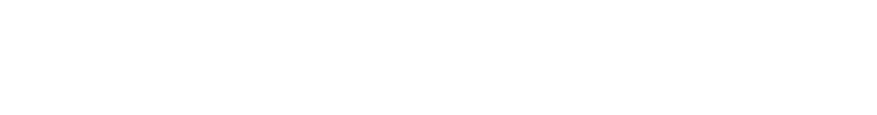

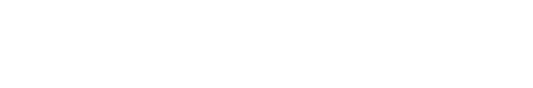

#***Grupo 21***

# Descrição das variaveis mais importantes





##1.   Documentos
*   ***original.csv***: Arquivo original do projeto
*   ***enderecos.xlsx***: Arquivo criado para não ter necessidade de executar o código de criação do endereço






##2.   Data Frames
*    ***df***: Criado a partir do documento original.csv e depois atualizado conforme a necessidade




##3.   Colunas adicionadas
* ***address***: coluna com o endereço
* ***number***: numero
* ***street***: Rua
* ***district***: Destrito
* ***resell***: vez que a casa foi vendida entre 02-05-2014 a 27-05-15



#Bibliotecas utilizadas




In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import geopy

---

#**ATENÇÃO**: a parte 1 não precisa ser executada, está apenas para mostrar como chegamos ao novo arquivo que será usado na parte 2 em diante



#1 Arquivo do projeto: ***original.csv***


1.1 Criação do dataframe ***df***







In [138]:
#df = pd.read_csv('original.csv')

1.2 Localização do endereço usando as colunas ***lat*** (latitude) e ***long***(longitude)

 Adicionando a coluna ***address*** ao dataframe

In [139]:
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
#address = list()
#for x in dados.index:
  #address.append(geolocator.reverse(str(df['lat'][x])+','+str(df['long'][x])))

1.3 Criando novo documento, pois a criação da coluna endereço foi demorada



In [140]:
#df.to_excel("enderecos.xlsx") 



---



#2 Utilizando o documento enderecos.xlsx

2.1 Atualizando o dataframe ***df***

In [141]:
df = pd.read_excel('enderecos.xlsx') 

##2.2 Adicionando novas colunas ao dataframe
2.2.1 Adicionando as colunas ***number, street, district, city, county, state,number2, country, x e y*** tiradas da separação da coluna endereço

In [142]:
df[['number','street','district','city','county', 'state','number2','country','x','y']] = df['address'].str.split(',', expand=True)

2.2.2 Adicionando colunas ***area/lot***

In [143]:
df['price/lot'] = df['price'] / df['sqft_lot']

2.2.3 Adicionando a coluna ***area/living***

In [144]:
df['price/living'] = df['price'] / df['sqft_living']

2.2.4 Adicionando a coluna ***resell***

In [145]:
unico = list()
repetido = list()
for x in df['id']:
  unico.append(x)
  repetido.append(unico.count(x))
df['resell'] = repetido

2.2.5 Adicionando coluna ***Mês da Venda*** e ***Ano da Venda***

In [146]:
df['date'] = df['date'].astype(np.datetime64)
df['Ano da Venda'] = df['date'].dt.year
df['Mês da Venda'] = df['date'].dt.month

2.3 Verificando os dados

In [147]:
print(df.dtypes)

Unnamed: 0                int64
id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
address                  object
number                   object
street                   object
district                 object
city                     object
county                   object
state                    object
number2                  object
country                  object
x       

In [148]:
df.isnull().sum()

Unnamed: 0           0
id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
address              0
number               0
street               0
district             0
city                 2
county              38
state              210
number2            863
country           7677
x                18034
y                21563
price/lot            0
price/living         0
resell               0
Ano da Venda         0
Mês da Venda         0
dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     21613 non-null  int64         
 1   id             21613 non-null  int64         
 2   date           21613 non-null  datetime64[ns]
 3   price          21613 non-null  int64         
 4   bedrooms       21613 non-null  int64         
 5   bathrooms      21613 non-null  float64       
 6   sqft_living    21613 non-null  int64         
 7   sqft_lot       21613 non-null  int64         
 8   floors         21613 non-null  float64       
 9   waterfront     21613 non-null  int64         
 10  view           21613 non-null  int64         
 11  condition      21613 non-null  int64         
 12  grade          21613 non-null  int64         
 13  sqft_above     21613 non-null  int64         
 14  sqft_basement  21613 non-null  int64         
 15  yr_built       2161

---

#3 Remoção de dados desnecessários 

3.1 Removendo linhas

3.1.1Verificando quantas vezes os imoveis foram vendidos

In [150]:
df['resell'] = df['resell'].astype(int)
df['resell'].value_counts()

1    21436
2      176
3        1
Name: resell, dtype: int64

3.1.2 Localizando pelo 'id' o imóvel que foi vendido a terceira vez

In [151]:
for x in df[df['resell']==3]['id']:
  print(x)

795000620


3.1.3 Removendo a linha ***17604*** que representa a terceira venda, verificamos que somente um imóvel teve a terceira venda e o lucro dessa venda nao esta entre as melhores nem as piores, portanto removemos pois não influenciaria em nosso resultado

In [152]:
df = df.drop([17604],axis = 0)

3.2 Removendo colunas

3.2.1 Remover as colunas ***city, county, state,number2, country, x e y***. 
Colunas não necessárias por serem comuns a todas as residencias e/ou conter erros

In [153]:
df = df.drop(['city', 'county', 'state','number2', 'country', 'x', 'y'], axis =1)

3.2.2 Removendo a coluna ***address***
foi utilizada para criar outras colunas

In [154]:
df = df.drop(['address'], axis = 1)

---

#4 Verificando o lucro das casas que foram vendidas mais de uma vez, usaremos de parâmetro para predizer as casas mais lucrativas e as casas de maior prejuizo

4.1 criando variaveis que serão usadas para calcular o lucro, só serão utilizadas para isso

In [155]:
df_imoveisv1 = df[df['resell'] == 1]
df_imoveisv1 = df_imoveisv1[['id','date','price', 'resell']]
df_imoveisv1.rename(columns={'date': 'Date_1ªvenda'}, inplace=True) 
df_imoveisv1.rename(columns={'price': 'price_1ªvenda'}, inplace=True) 

df_imoveisv2 = df[df['resell'] == 2]
df_imoveisv2 = df_imoveisv2[['id','date','price', 'resell']]
df_imoveisv2.rename(columns={'date': 'Date_2ªvenda'}, inplace=True) 
df_imoveisv2.rename(columns={'price': 'price_2ªvenda'}, inplace=True)

In [156]:
df_imoveis1e2 = df_imoveisv1[['id','Date_1ªvenda','price_1ªvenda']].merge(df_imoveisv2[['id','Date_2ªvenda','price_2ªvenda']], on='id')
df_imoveis1e2['Lucro'] = df_imoveis1e2['price_2ªvenda'] - df_imoveis1e2['price_1ªvenda']
display(df_imoveis1e2.sort_values(by=['Lucro']))

,id,Date_1ªvenda,price_1ªvenda,Date_2ªvenda,price_2ªvenda,Lucro
118,7167000040,2014-08-13,740000,2015-03-05,700000,-40000
42,2726049071,2014-12-11,510000,2015-04-08,489950,-20050
59,4139420590,2014-05-20,1212500,2014-08-27,1200000,-12500
91,2767603612,2014-05-12,500000,2015-01-13,489000,-11000
7,8682262400,2014-07-18,430000,2015-05-13,419950,-10050
...,...,...,...,...,...,...
82,2568300045,2014-06-25,305000,2015-03-19,649950,344950
77,4443800385,2014-08-18,410000,2015-05-06,778100,368100
26,7409700215,2014-06-06,550000,2015-03-13,921500,371500
70,7977201065,2014-11-04,350000,2015-03-05,740000,390000


In [157]:
df_lucro = df.join(df_imoveis1e2[['Lucro']], how = 'left', lsuffix='left', rsuffix='right' ).copy()
df_lucro

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,5650,10012,61st Avenue South,Rainier Beach,39.274336,188.050847,1,2014,10,270000.0
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,7639,837,Northeast 127th Street,Northgate,74.288870,209.338521,1,2014,12,16000.0
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,8062,15109,81st Avenue Northeast,Moorlands,18.000000,233.766234,1,2015,2,8500.0
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,5000,9236,Fauntleroy Way Southwest,Fauntleroy,120.800000,308.163265,1,2014,12,74900.0
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,7503,923,221st Avenue Northeast,Sammamish,63.118812,303.571429,1,2015,2,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5,NaN
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2,NaN
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6,NaN
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1,NaN


4.1.1 Data frame com ordem decrescente usando os valores do lucro como métrica

Usado para verificar os maiores lucros

In [158]:
display(df_lucro.sort_values(by=['Lucro'],ascending=False))

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
168,168,3261020370,2014-06-05,653000,3,2.50,2680,9750,1.0,0,...,8750,8236,Northeast 115th Way,Kirkland,66.974359,243.656716,1,2014,6,529950.0
70,70,1525059190,2014-09-12,1040000,5,3.25,4770,50094,1.0,0,...,38917,13511,Northeast 50th Street,Bellevue,20.760969,218.029350,1,2014,9,390000.0
26,26,1794500383,2014-06-26,937000,3,1.75,2450,2691,2.0,0,...,3573,206,West Boston Street,Queen Anne,348.197696,382.448980,1,2014,6,371500.0
77,77,2391600320,2015-04-20,480000,3,1.00,1040,5060,1.0,0,...,5060,4441,48th Avenue Southwest,West Seattle,94.861660,461.538462,1,2015,4,368100.0
82,82,9418400240,2014-10-28,355000,2,1.00,2020,6720,1.0,0,...,6720,6018,32nd Avenue South,Holly Park,52.827381,175.742574,1,2014,10,344950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5,NaN
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2,NaN
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6,NaN
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1,NaN


4.1.2 Data frame com ordem decrescente usando os valores do lucro como métrica

Usado para verificarmos os maiores prejuizos

In [159]:
display(df_lucro.sort_values(by=['Lucro'],ascending=True))

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
118,118,3454800060,2015-01-08,171800,4,2.00,1570,9600,1.0,0,...,9000,11834,Military Road South,Boulevard Park,17.895833,109.426752,1,2015,1,-40000.0
42,42,7203220400,2014-07-07,861990,5,2.75,3595,5639,2.0,0,...,5639,9704,242nd Way Northeast,Deveron,152.862210,239.774687,1,2014,7,-20050.0
59,59,8079040320,2015-02-23,430000,4,3.00,1850,9976,2.0,0,...,8542,1520,Ilwaco Avenue Northeast,Summerwind,43.103448,232.432432,1,2015,2,-12500.0
91,91,5036300431,2015-03-11,1099880,5,2.75,3520,6353,2.0,0,...,6250,2650,West Bertona Street,Lawton Park,173.127656,312.465909,1,2015,3,-11000.0
7,7,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,0,...,9711,21421,14th Avenue South,Des Moines Creek,30.053548,275.330189,1,2015,1,-10050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,...,1509,927,North 97th Street,Licton Springs,318.302387,235.294118,1,2014,5,NaN
21609,21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,...,7200,2211,Southwest 103rd Place,White Center,68.811285,173.160173,1,2015,2,NaN
21610,21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,...,2007,902,26th Avenue South,Leschi,297.852593,394.216667,1,2014,6,NaN
21611,21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,...,1287,2136,Northwest Boulder Way Drive,Talus,167.504188,250.000000,1,2015,1,NaN


#5 Criação de gráficos

5.1 Gráfico de barra com a quantidade de venda nos meses

Text(0, 0.5, 'Count')

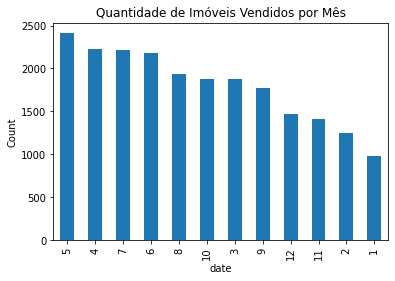

In [160]:
df['Mês da Venda'].value_counts().plot(kind='bar')
plt.title('Quantidade de Imóveis Vendidos por Mês')
plt.xlabel('date')
plt.ylabel('Count')

5.2 Gráfico de correlação de calor, removendo as colunas ***id, zipcode, lat, long, Ano da Venda e Mês da Venda***, pois não ajudam na visualização da correlação

In [161]:
df_lucro.drop(['id','lat','long','Ano da Venda','Mês da Venda'],axis = 1).corr()['Lucro']

Unnamed: 0      -0.013821
price            0.127754
bedrooms        -0.000579
bathrooms        0.020081
sqft_living      0.129565
sqft_lot         0.102967
floors          -0.079126
waterfront      -0.097038
view             0.019148
condition       -0.036849
grade            0.138041
sqft_above       0.032370
sqft_basement    0.185971
yr_built        -0.029272
yr_renovated    -0.167748
zipcode          0.017925
sqft_living15    0.074135
sqft_lot15       0.042511
price/lot        0.044342
price/living     0.069769
resell           0.142156
Lucro            1.000000
Name: Lucro, dtype: float64

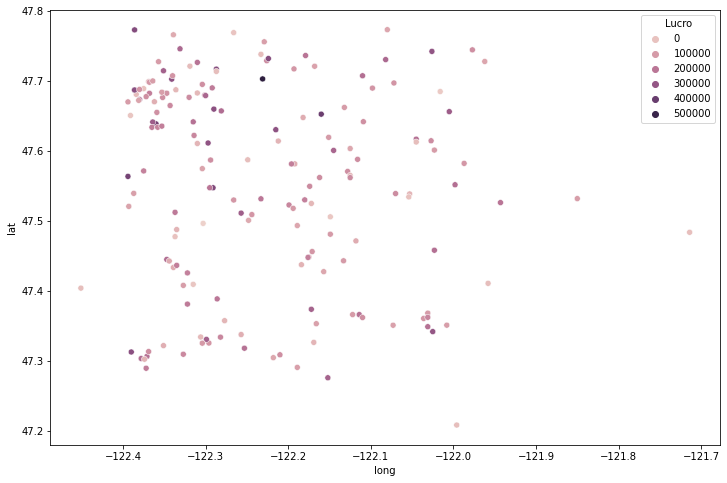

In [162]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df_lucro,hue='Lucro')

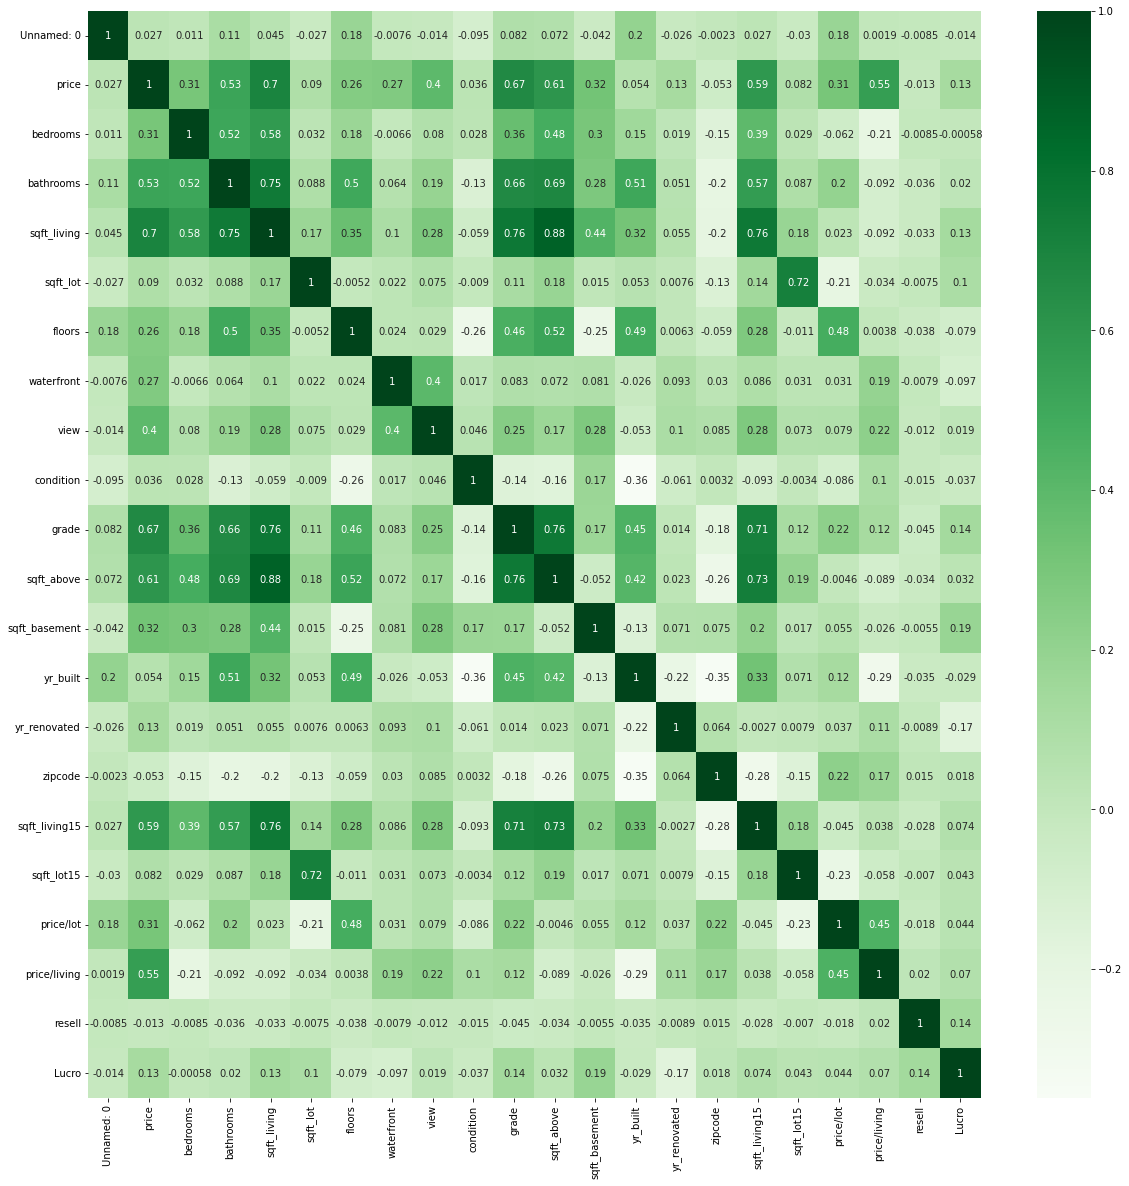

In [163]:
plt.figure(figsize = (20,20))
sns.heatmap(df_lucro.drop(['id','lat','long','Ano da Venda','Mês da Venda'],axis = 1).corr(),  annot=True, cmap='Greens')

5.3 Gráficos do zipcode do imóvel do melhor lucro

5.3.1 Imóvel de maior lucro

In [164]:
df_lucro[df_lucro['id'] == 3261020370]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro
168,168,3261020370,2014-06-05,653000,3,2.5,2680,9750,1.0,0,...,8750,8236,Northeast 115th Way,Kirkland,66.974359,243.656716,1,2014,6,529950.0


In [165]:
df_lucro[df_lucro['id'] == 3261020370]['zipcode']

168    98034
Name: zipcode, dtype: int64

criação do dataframe com os imoveis do mesmo zipcode do imovel com maior lucro

In [177]:
df_lucro[df_lucro['zipcode'] == 98034]
df_top = df_lucro[df_lucro['zipcode'] == 98034].copy()

In [182]:

df_lucro[df_lucro['district'] == 'Kirkland']

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,number,street,district,price/lot,price/living,resell,Ano da Venda,Mês da Venda,Lucro


Preço dos imóveis do df_top

In [179]:
df_lucro[df_lucro['zipcode'] == 98034]['price']

71       325000
121      391500
161      438000
163      441000
165      370000
          ...  
20580    289000
20756    249000
20868    479000
21153    915000
21322    834950
Name: price, Length: 545, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f005f72ee50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0059c4bc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0059c449d0>],
 'means': [<matplotlib.lines.Line2D at 0x7f0059c61710>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0059c61ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f005f730850>,
  <matplotlib.lines.Line2D at 0x7f005f730290>]}

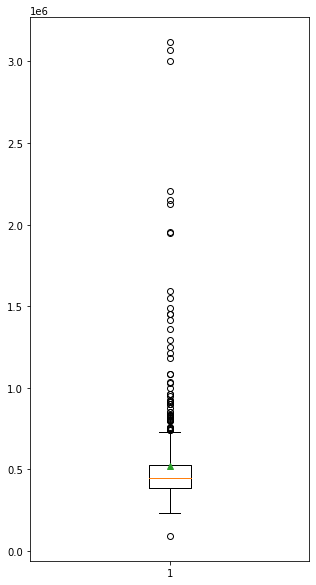

In [178]:
fig = plt.figure(figsize=(5,10))
plt.boxplot(df_top['price'],showmeans=True)

Grafico com barras mostrando a região do imóvel que verificamos o maior lucro

(array([143., 339.,  40.,   8.,   7.,   0.,   5.,   0.,   0.,   3.]),
 array([  90000.,  393000.,  696000.,  999000., 1302000., 1605000.,
        1908000., 2211000., 2514000., 2817000., 3120000.]),
 <a list of 10 Patch objects>)

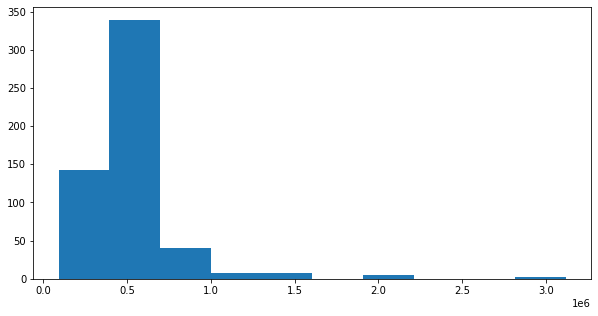

In [181]:
fig = plt.figure(figsize=(10,5))
plt.hist(df_top['price'])

---

#Fazendo de outra forma

In [123]:
venda2 = df[df['resell']==2]
idvenda2 = df[df['resell']==2]['id']
precovenda2 = df[df['resell']==2]['price']

# calculando o lucro
precovenda = list()
lucro = list()
for id in idvenda2:
  precovenda.append(df[df['id']==id]['price'])

#df apenas com o preço quando o imovel foi vendido a segunda vez
df_imven = pd.DataFrame(precovenda).transpose().groupby(level=0, axis=1).sum()

#pegando apenas o valor da coluna preço
lista = df_imven['price'].values.tolist()

#codigo para calcular o lucro
lucro = list()
auxiliar = 0
lista = df_imven['price'].values.tolist()
for x in range(0, len(lista)+1, 2):        
  if x == len(lista):
      break
  else:
      auxiliar = lista[x+1] - lista[x]
      lucro.append(auxiliar)

df_lucros = df[df['resell']==2].copy()

df_lucros['Lucro'] = lucro

In [ ]:
df_lucros

5.3 Gráfico de dispersão, das casas com maiores lucros

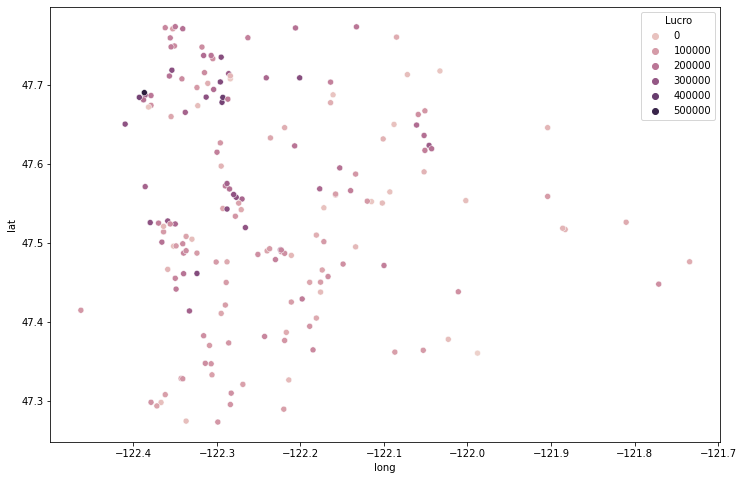

In [127]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df_lucros,hue='Lucro')

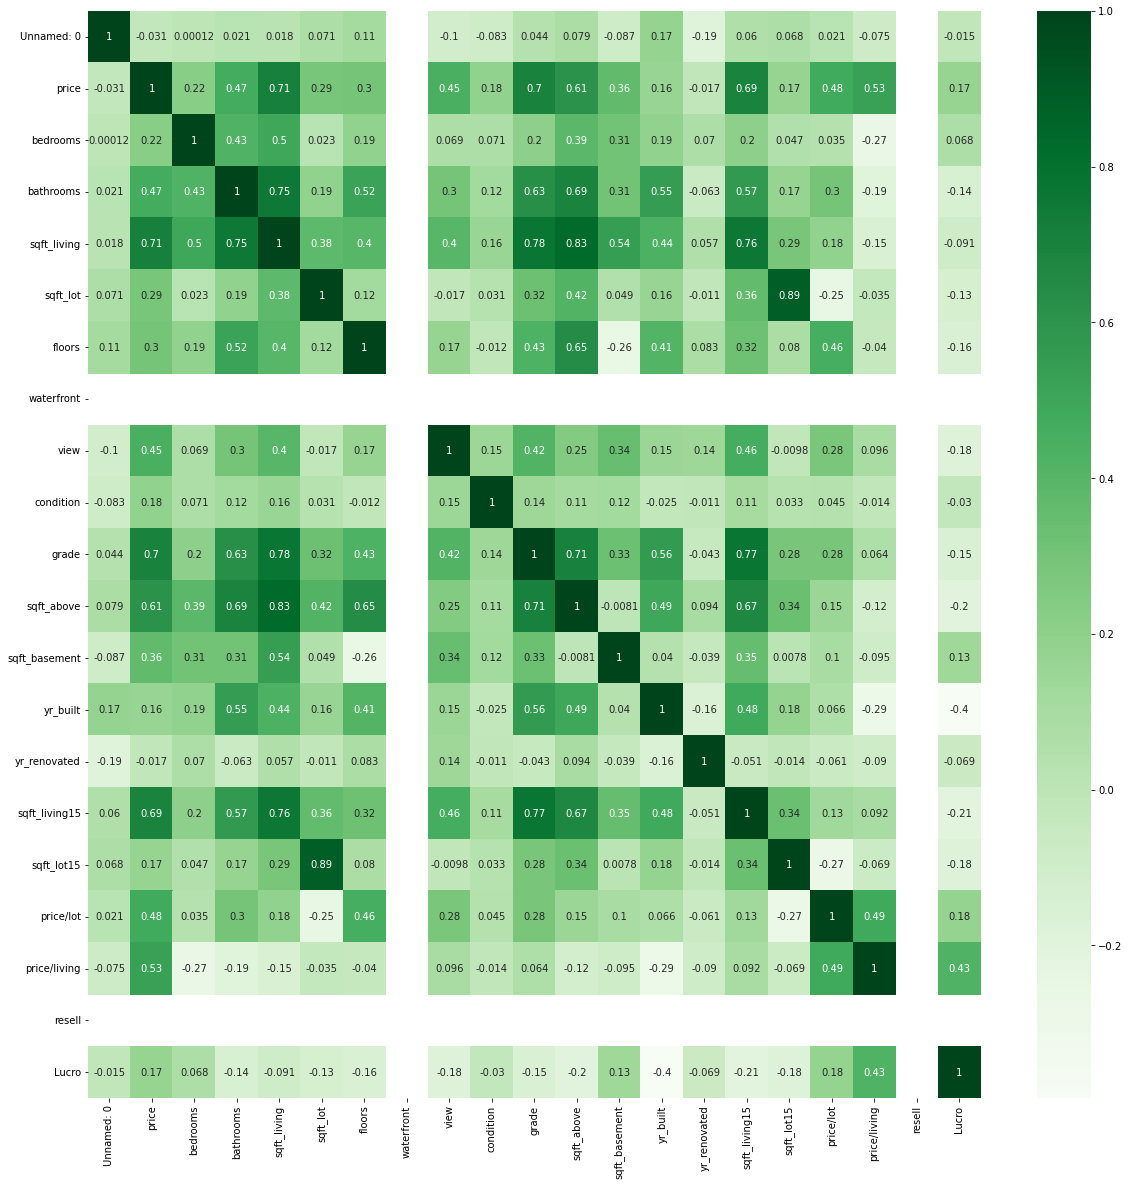

In [128]:
plt.figure(figsize = (20,20))
sns.heatmap(df_lucros.drop(['id','zipcode','lat','long','Ano da Venda','Mês da Venda'],axis = 1).corr(),  annot=True, cmap='Greens')

In [ ]:
df_lucros.drop(['id','zipcode','lat','long','Ano da Venda','Mês da Venda'],axis = 1).corr()['Lucro']

#O que falta corrigir e fazer 
##Os lucros não estão concisos (fiz de duas formas com os codigos das Andreia/Alessa e teve o msmo resultado)
##***Correlações com o lucro ficaram bem baixas(discutir as razões) as outras colunas usadas para a correlação provavelmente não exercem nenhuma alteração para o lucro ou estamos com algum erro.***
#verificar com as colunas não numericas ou que foram removidas 
#o grafico de disperção parece ser mais significativo, verificar a importancia do local para a valorização e desvalorização do imóvel
#verificar a média do preço da area para achar casas abaixo do preço para verificar casas com maiores lucros
#descobrir a conclusao do projeto
# explicar detalhadamente como chegamos a conclusao que sao as 5 melhores e as 5 piores
#completar o relatorio do arquivo word miniprojeto_roofimoveis
#na descrição do deliverable está que precisa ser feito em formato do crispy-Dm, verificar alguma necessidade de adequação ou não
#é disponibilizado um power point para completarmos com o nosso deliverable< verificar a necessidade de utilizar ou não